In [52]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd
from scipy.stats import shapiro
from scipy.stats import ttest_ind, ttest_1samp
import scipy.stats as stats
# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns
# Command to tell Python to actually display the graphs
%matplotlib inline

In [53]:
df = pd.read_csv('Wholesale+Customers+Data.csv')
df

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,1,Retail,Other,12669,9656,7561,214,2674,1338
1,2,Retail,Other,7057,9810,9568,1762,3293,1776
2,3,Retail,Other,6353,8808,7684,2405,3516,7844
3,4,Hotel,Other,13265,1196,4221,6404,507,1788
4,5,Retail,Other,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...,...
435,436,Hotel,Other,29703,12051,16027,13135,182,2204
436,437,Hotel,Other,39228,1431,764,4510,93,2346
437,438,Retail,Other,14531,15488,30243,437,14841,1867
438,439,Hotel,Other,10290,1981,2232,1038,168,2125


## Problem 1

### Wholesale Customer Analysis

### Problem Statement
<font size =3>A wholesale distributor operating in different regions of Portugal has information on annual spending of several items in their stores across different regions and channels. The data consists of 440 large retailers’ annual spending on 6 different varieties of products in 3 different regions (Lisbon, Oporto, Other) and across different sales channel (Hotel, Retail).</font>



<font size =3>1.1 Use methods of descriptive statistics to summarize data. Which Region and which Channel spent the most? Which Region and which Channel spent the least?</font>

#### Descriptive statistics to summarize data

In [54]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Buyer/Spender,440.0,NaN,NaN,NaN,220.5,127.161315,1.0,110.75,220.5,330.25,440.0
Channel,440,2,Hotel,298,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Region,440,3,Other,316,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fresh,440.0,NaN,NaN,NaN,12000.297727,12647.328865,3.0,3127.75,8504.0,16933.75,112151.0
Milk,440.0,NaN,NaN,NaN,5796.265909,7380.377175,55.0,1533.0,3627.0,7190.25,73498.0
Grocery,440.0,NaN,NaN,NaN,7951.277273,9503.162829,3.0,2153.0,4755.5,10655.75,92780.0
Frozen,440.0,NaN,NaN,NaN,3071.931818,4854.673333,25.0,742.25,1526.0,3554.25,60869.0
Detergents_Paper,440.0,NaN,NaN,NaN,2881.493182,4767.854448,3.0,256.75,816.5,3922.0,40827.0
Delicatessen,440.0,NaN,NaN,NaN,1524.870455,2820.105937,3.0,408.25,965.5,1820.25,47943.0


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Buyer/Spender     440 non-null    int64 
 1   Channel           440 non-null    object
 2   Region            440 non-null    object
 3   Fresh             440 non-null    int64 
 4   Milk              440 non-null    int64 
 5   Grocery           440 non-null    int64 
 6   Frozen            440 non-null    int64 
 7   Detergents_Paper  440 non-null    int64 
 8   Delicatessen      440 non-null    int64 
dtypes: int64(7), object(2)
memory usage: 31.1+ KB


In [56]:
df.isnull().sum()

Buyer/Spender       0
Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicatessen        0
dtype: int64

In [57]:
df['Spend']=df.iloc[:,3:9].sum(axis=1)
df.head()

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,Spend
0,1,Retail,Other,12669,9656,7561,214,2674,1338,34112
1,2,Retail,Other,7057,9810,9568,1762,3293,1776,33266
2,3,Retail,Other,6353,8808,7684,2405,3516,7844,36610
3,4,Hotel,Other,13265,1196,4221,6404,507,1788,27381
4,5,Retail,Other,22615,5410,7198,3915,1777,5185,46100


In [58]:
df1= df.groupby(['Region']).sum().reset_index()
df1.head()

,Region,Buyer/Spender,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,Spend
0,Lisbon,18095,854833,422454,570037,231026,204136,104327,2386813
1,Oporto,14899,464721,239144,433274,190132,173311,54506,1555088
2,Other,64026,3960577,1888759,2495251,930492,890410,512110,10677599


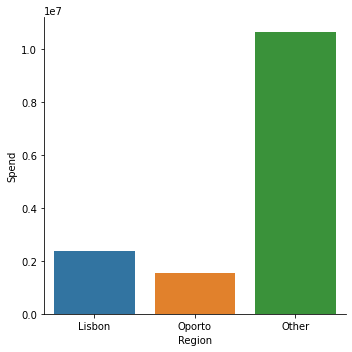

In [15]:
sns.catplot(data=df1, x="Region", y="Spend", kind='bar');

In [59]:
df2= df.groupby(['Channel']).sum().reset_index()
df2.head()

,Channel,Buyer/Spender,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,Spend
0,Hotel,71034,4015717,1028614,1180717,1116979,235587,421955,7999569
1,Retail,25986,1264414,1521743,2317845,234671,1032270,248988,6619931


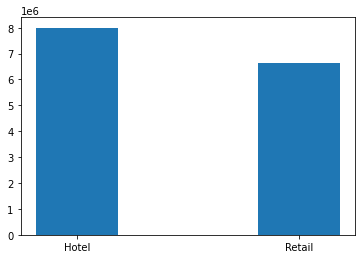

In [60]:
plt.bar(df2['Channel'], df2['Spend'], width = 0.37);

 - <b>Other spent the most, Oporto the least</b> with respect to Region. 
 - <b>Hotel spent the most and Retail the least</b> with respect to Channel.

<font size =3> 1.2 There are 6 different varieties of items that are considered. Describe and comment/explain all the varieties across Region and Channel? Provide a detailed justification for your answer. </font>

In [61]:
(pd.pivot_table(df, values=['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicatessen'], margins=True,
                margins_name='Total',index=['Region'], aggfunc=np.sum))

,Delicatessen,Detergents_Paper,Fresh,Frozen,Grocery,Milk
Region,,,,,,
Lisbon,104327,204136,854833,231026,570037,422454
Oporto,54506,173311,464721,190132,433274,239144
Other,512110,890410,3960577,930492,2495251,1888759
Total,670943,1267857,5280131,1351650,3498562,2550357


In [62]:
(pd.pivot_table(df, values=['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicatessen'], margins=True,
                margins_name='Total',index=['Channel'], aggfunc=np.sum))

,Delicatessen,Detergents_Paper,Fresh,Frozen,Grocery,Milk
Channel,,,,,,
Hotel,421955,235587,4015717,1116979,1180717,1028614
Retail,248988,1032270,1264414,234671,2317845,1521743
Total,670943,1267857,5280131,1351650,3498562,2550357


#### Barplot based on pivot table

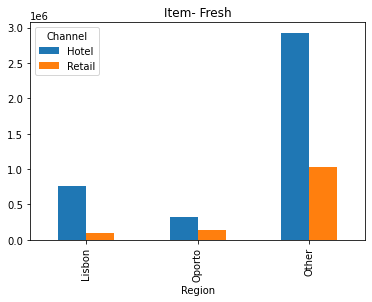

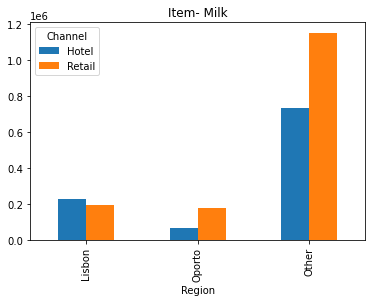

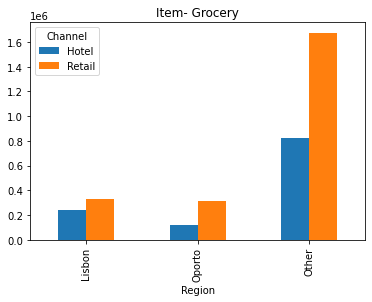

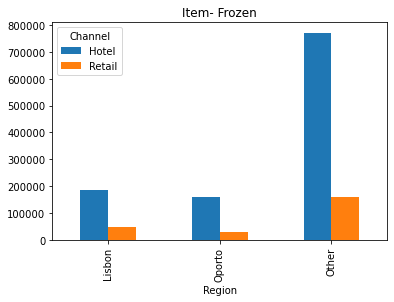

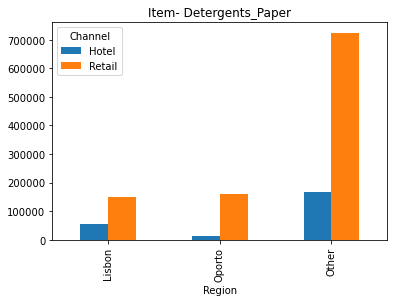

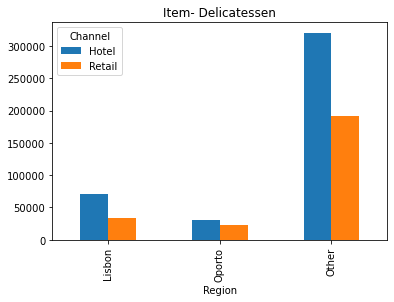

In [66]:
store= ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicatessen']
def bar_plot(x):
    np.round(pd.pivot_table(df, values=x, 
                                index=['Region'], 
                                columns=['Channel'], 
                                aggfunc=np.sum,
                                fill_value=0),2).plot.bar(title='Item- {}'.format(x), );
for items in store:
    bar_plot(items)

#### Catplot (another way to plot the same data)

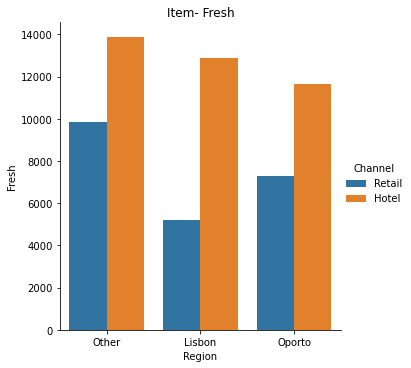

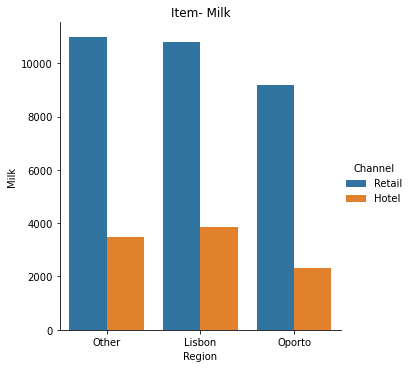

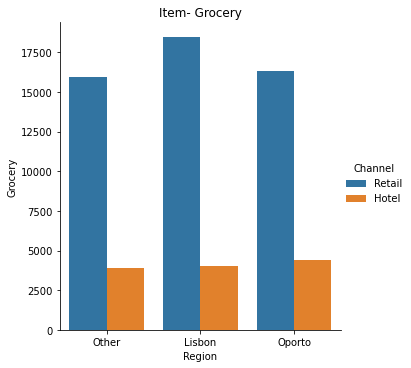

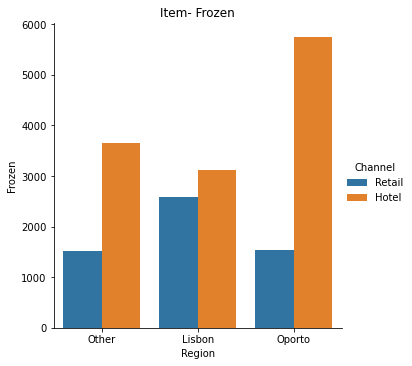

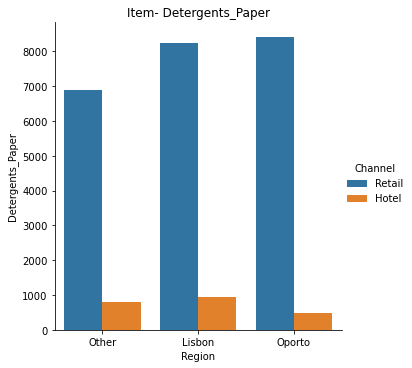

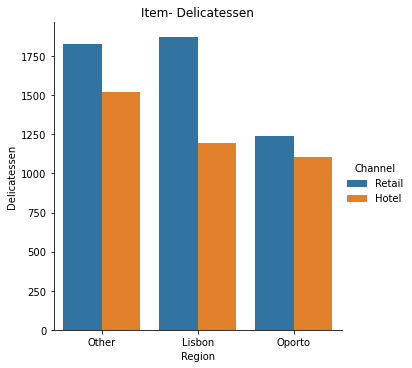

In [16]:
store= ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicatessen']
for items in store:
    sns.catplot(x="Region", y= items, hue= "Channel", kind="bar", ci=None, data=df);
    plt.title('Item- {}'.format(items));

From the plot above, it can be inferred-- 
 - Milk, Grocery & Detergents_Paper have higher spend in the Retail channel versus Hotel, across all regions. 
 - Fresh and Frozen have higher consumption in the Hotel channel versus Retail, across all regions. 
 - Spend for Fresh and Grocery is the maximum across all regions and channel while Delicatessen is the least across Region and Channel.


<font size =3>1.3 On the basis of a descriptive measure of variability, which item shows the most inconsistent behaviour? Which items show the least inconsistent behaviour?</font>

In [65]:
df_consistency= df.describe()
df_consistency.drop(["Spend", "Buyer/Spender"], axis=1, inplace=True)
df_consistency.loc[('CV'), :] = df_consistency.loc[('std'), :]/df_consistency.loc[('mean'), :]
df_consistency

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000
CV,1.053918,1.273299,1.195174,1.580332,1.654647,1.849407


From the given data, it is clear that <b>most inconsistent behavior shown by item – Delicatessen</b>, with highest CV value(1.05). And <b>least inconsistent behavior shown by item – Fresh</b>, with least CV value(1.84).
The Coefficient of Variation(CV) measures how consistent the different values of the set are from the mean of the data set. The smaller the CV, the higher is the consistency.

<font size=3> 1.4 Are there any outliers in the data? Back up your answer with a suitable plot/technique with the help of detailed comments.</font>

In [49]:
store= ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicatessen']

for items in store:
    list1= round(df[items].mean(),2)
    #print('{} '.format(items), round(df[items].mean(),2)) 
list1

TypeError: 'float' object is not subscriptable

In [50]:
df_items= df.copy(deep=True)
df_items.drop(["Buyer/Spender"], axis=1, inplace=True)
plt.figure(figsize=(15,8))
sns.boxplot(data=df_items, palette="Set3")

AttributeError: 'float' object has no attribute 'copy'

From the above boxplot, one can conclude that there are <b>outliers in all the data</b>. 




<font size=3>1.5 On the basis of your analysis, what are your recommendations for the business? How can your analysis help the business to solve its problem? Answer from the business perspective.</font>

According to the analysis, inconsistencies in the spending of various things should be reduced (by calculating the Coefficient of Variation). The spending in the hotel and retail sectors varied but should be about equal. Additionally, spending should be the same across regions. In addition to fresh and grocery products, other things need your attention.


## Problem 2

### State University Survey

### Problem Statement

<font size=3>The Student News Service at Clear Mountain State University (CMSU) has decided to gather data about the undergraduate students that attend CMSU. CMSU creates and distributes a survey of 14 questions and receives responses from 62 undergraduates (stored in the Survey data set).

<font size=3>2.1. For this data, construct the following contingency tables (Keep Gender as row variable)
<br>
2.1.1. Gender and Major
<br>
2.1.2. Gender and Grad Intention
<br>
2.1.3. Gender and Employment
<br>
2.1.4. Gender and Computer
<br>




In [40]:
df_survey = pd.read_csv('Survey-1.csv')
df_survey.head()

,ID,Gender,Age,Class,Major,Grad Intention,GPA,Employment,Salary,Social Networking,Satisfaction,Spending,Computer,Text Messages
0,1,Female,20,Junior,Other,Yes,2.9,Full-Time,50.0,1,3,350,Laptop,200
1,2,Male,23,Senior,Management,Yes,3.6,Part-Time,25.0,1,4,360,Laptop,50
2,3,Male,21,Junior,Other,Yes,2.5,Part-Time,45.0,2,4,600,Laptop,200
3,4,Male,21,Junior,CIS,Yes,2.5,Full-Time,40.0,4,6,600,Laptop,250
4,5,Male,23,Senior,Other,Undecided,2.8,Unemployed,40.0,2,4,500,Laptop,100


In [41]:
pd.crosstab(df_survey['Gender'], df_survey['Major'], margins=True, margins_name="Total")

Major,Accounting,CIS,Economics/Finance,International Business,Management,Other,Retailing/Marketing,Undecided,Total
Gender,,,,,,,,,
Female,3,3,7,4,4,3,9,0,33
Male,4,1,4,2,6,4,5,3,29
Total,7,4,11,6,10,7,14,3,62


In [42]:
pd.crosstab(df_survey['Gender'], df_survey['Grad Intention'])

Grad Intention,No,Undecided,Yes
Gender,,,
Female,9,13,11
Male,3,9,17


In [43]:
pd.crosstab(df_survey['Gender'], df_survey['Employment'])

Employment,Full-Time,Part-Time,Unemployed
Gender,,,
Female,3,24,6
Male,7,19,3


In [45]:
pd.crosstab(df_survey['Gender'], df_survey['Computer'])

Computer,Desktop,Laptop,Tablet
Gender,,,
Female,2,29,2
Male,3,26,0


2.2. Assume that the sample is a representative of the population of CMSU. Based on the data, answer the following question:
<br>
2.2.1 What is the probability that a randomly selected CMSU student will be male?
<br>
2.2.2 What is the probability that a randomly selected CMSU student will be female?

In [21]:
df_survey['Gender'].count()

62

In [22]:
df_survey['Gender'].value_counts()

Female    33
Male      29
Name: Gender, dtype: int64

In [24]:
male= 29/62
male

0.46774193548387094

After calculation, we got the result that <b>probability of 46.77% student will be male in CMSU if randomly selected</b>.

In [25]:
female= 33/62
female

0.532258064516129

Ans: After calculation, we got the result that <b>probability of 53.23% student will be female in CMSU if randomly selected</b>.

<font size=3> 2.3. Assume that the sample is a representative of the population of CMSU. Based on the data, answer the following question:
<br>
2.3.1 Find the conditional probability of different majors among the male students in CMSU.
<br>
2.3.2 Find the conditional probability of different majors among the female students of CMSU.
<br> </font>

In [47]:
pd.crosstab(df_survey['Gender'], df_survey['Major'], margins=True, margins_name="Total")

Major,Accounting,CIS,Economics/Finance,International Business,Management,Other,Retailing/Marketing,Undecided,Total
Gender,,,,,,,,,
Female,3,3,7,4,4,3,9,0,33
Male,4,1,4,2,6,4,5,3,29
Total,7,4,11,6,10,7,14,3,62


In [33]:
accounting_male= 4/29
accounting_male*100

13.793103448275861

In [29]:
cis_male= 1/29
cis_male*100

3.4482758620689653

In [34]:
eco_male= 4/29
eco_male*100

13.793103448275861

In [35]:
ib_male= 2/29
ib_male*100

6.896551724137931

In [37]:
mgmt_male= 6/29
mgmt_male*100

20.689655172413794

In [39]:
other_male= 4/29
other_male*100

13.793103448275861

In [41]:
retail_male= 5/29
retail_male*100

17.24137931034483

In [43]:
undecide_male= 3/29
undecide_male*100

10.344827586206897

Ans: Using contingency tables of Gender and Majors, we got the total numbers of males and number of males
opting for different majors.

Results–<br>
<b>Probability of Males opting for Accounting is 13.79%<br>
Probability of Males opting for CIS is 3.45%<br>
Probability of Males opting for Economics/Finance is 13.79%<br>
Probability of Males opting for InternationalBusiness is 6.90%<br>
Probability of Males opting for Management is 20.69%<br>
Probability of Males opting for Other is 13.79%<br>
Probability of Males opting for Retailing/Marketing is 17.24%<br>
Probability of Males opting for Undecided is 10.34%</b>


In [44]:
accounting_female= 3/33
accounting_female*100

9.090909090909092

In [45]:
cis_female= 3/33
cis_female*100

9.090909090909092

In [46]:
eco_female= 7/33
eco_female*100

21.21212121212121

In [47]:
ib_female= 4/33
ib_female*100

12.121212121212121

In [48]:
mgmt_female= 4/33
mgmt_female*100

12.121212121212121

In [49]:
other_female= 3/33
other_female*100

9.090909090909092

In [50]:
retail_female= 9/33
retail_female*100

27.27272727272727

In [51]:
undecide_female= 0/33
undecide_female*100

0.0

Ans: Using contingency tables of Gender and Majors, we got the total numbers of females and number of females opting for different majors.

Results–<br>
<b>Probability of Females opting for Accounting is 9.09%<br>
Probability of Females opting for CIS is 9.09%<br>
Probability of Females opting for Economics/Finance is 21.21%<br>
Probability of Females opting for InternationalBusiness is 12.12%<br>
Probability of Females opting for Management is 12.12%<br>
Probability of Females opting for Other is 9.09%<br>
Probability of Females opting for Retailing/Marketing is 27.27%<br>
Probability of Females opting for Undecided is 0.00%</b>

<font size=3>2.4. Assume that the sample is a representative of the population of CMSU. Based on the data, answer the following question:
<br>
2.4.1 Find the probability That a randomly chosen student is a male and intends to graduate.
<br>
2.4.2 Find the probability that a randomly selected student is a female and does NOT have a laptop.
<br></font>

In [52]:
pd.crosstab(df_survey['Gender'], df_survey['Grad Intention'])

Grad Intention,No,Undecided,Yes
Gender,,,
Female,9,13,11
Male,3,9,17


In [55]:
male_graduate= 17/29
male_graduate*100

58.620689655172406

Ans: Using contingency table, after calculation, <b>Probability of male and intends to be graduate is 58.62%</b>

In [56]:
pd.crosstab(df_survey['Gender'], df_survey['Computer'])

Computer,Desktop,Laptop,Tablet
Gender,,,
Female,2,29,2
Male,3,26,0


In [149]:
female_no_laptop= (33/62)*(4/33)
female_no_laptop*100

6.451612903225806

Ans: Using contingency table, after calculation, <b>Probability of female and does NOT have a laptop is 6.45% </b>.


<font size=3> 2.5. Assume that the sample is a representative of the population of CMSU. Based on the data, answer the following question:
<br>
2.5.1 Find the probability that a randomly chosen student is a male or has a full-time employment
<br>
2.5.2 Find the conditional probability that given a female student is randomly chosen, she is majoring in international business or management.
<br></font>

In [64]:
pd.crosstab(df_survey['Gender'], df_survey['Employment'])

Employment,Full-Time,Part-Time,Unemployed
Gender,,,
Female,3,24,6
Male,7,19,3


In [70]:
male_or_fulltime= (3+7+19+3)/62
male_or_fulltime*100

51.61290322580645

Ans: Using contingency table, after calculation, <b>Probability of chosen student is a male or has a full-time employment is 51.61% </b>.

In [66]:
pd.crosstab(df_survey['Gender'], df_survey['Major'])

Major,Accounting,CIS,Economics/Finance,International Business,Management,Other,Retailing/Marketing,Undecided
Gender,,,,,,,,
Female,3,3,7,4,4,3,9,0
Male,4,1,4,2,6,4,5,3


In [71]:
ib_mgmt_female= (4+4)/33
ib_mgmt_female*100

24.242424242424242

Ans: Using contingency table, after calculation, <b>Probability that given a female student is randomly chosen, she is majoring in international business or management is 24.24% </b>.

<font size=3>2.6 Construct a contingency table of Gender and Intent to Graduate at 2 levels (Yes/No). The Undecided students are not considered now and the table is a 2x2 table. Do you think graduate intention and being female are independent events?
<br></font>

--Contingency table of Gender and Intent to Graduate at 2 levels (Yes/No)--

In [101]:
grad= pd.crosstab(df_survey['Gender'], df_survey['Grad Intention'], margins=True, margins_name="Total").copy(deep=True)
#grad.drop("Undecided", axis=1, inplace=True).(margins=True, margins_name="Total")
grad.drop(["Undecided", "Total"], axis=1, inplace=True)
grad['Total'] = grad['No'] + grad['Yes']
grad

Grad Intention,No,Yes,Total
Gender,,,
Female,9,11,20
Male,3,17,20
Total,12,28,40


Ans:
P(Grad Intention Yes) = 28/40 = 0.7<br>
P(Grad Intention Yes|Female)/ 20 = 0.55<br>
These probabilities are not equal. This suggests that the two events are independent.

<font size=3> 2.7 Note that there are four numerical (continuous) variables in the data set, GPA, Salary, Spending and Text Messages. Answer the following questions based on the data
<br>
2.7.1 If a student is chosen randomly, what is the probability that his/her GPA is less than 3?
<br>
2.7.2 Find conditional probability that a randomly selected male earns 50 or more. Find conditional probability that a randomly selected female earns 50 or more.
<br></font>

In [103]:
pd.crosstab(df_survey['Gender'], df_survey['GPA'], margins=True, margins_name="Total")

GPA,2.3,2.4,2.5,2.6,2.8,2.9,3.0,3.1,3.2,3.3,3.4,3.5,3.6,3.7,3.8,3.9,Total
Gender,,,,,,,,,,,,,,,,,
Female,1,1,2,0,1,3,5,2,4,3,2,4,1,2,1,1,33
Male,0,0,4,2,2,1,2,5,2,2,5,2,2,0,0,0,29
Total,1,1,6,2,3,4,7,7,6,5,7,6,3,2,1,1,62


In [104]:
17/62

0.27419354838709675

Ans: Using contingency table, after calculation, <b>Probability that his/her GPA is less than 3 is 27.41% </b>.

In [105]:
pd.crosstab(df_survey['Gender'], df_survey['Salary'], margins=True, margins_name="Total")

Salary,25.0,30.0,35.0,37.0,37.5,40.0,42.0,45.0,47.0,47.5,50.0,52.0,54.0,55.0,60.0,65.0,70.0,78.0,80.0,Total
Gender,,,,,,,,,,,,,,,,,,,,
Female,0,5,1,0,1,5,1,1,0,1,5,0,0,5,5,0,1,1,1,33
Male,1,0,1,1,0,7,0,4,1,0,4,1,1,3,3,1,0,0,1,29
Total,1,5,2,1,1,12,1,5,1,1,9,1,1,8,8,1,1,1,2,62


In [107]:
14/29

0.4827586206896552

Ans: Using contingency table, after calculation, <b>Probability that a randomly selected male earns 50 or more is 48.27% </b>.

In [108]:
18/33

0.5454545454545454

Ans: Using contingency table, after calculation, <b>Probability that a randomly selected female earns 50 or more is 54.54% </b>.


<font size=3> 2.8.1 Note that there are four numerical (continuous) variables in the data set, GPA, Salary, Spending and Text Messages. For each of them comment whether they follow a normal distribution.
<br>
2.8.2 Write a note summarizing your conclusions.</font>

Skewness  -0.3146000894506981
count    62.000000
mean      3.129032
std       0.377388
min       2.300000
25%       2.900000
50%       3.150000
75%       3.400000
max       3.900000
Name: GPA, dtype: float64


C:\Users\ankit\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


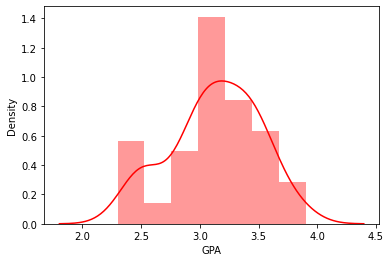

In [164]:
sns.distplot(df_survey['GPA'], kde = True, color ='red');
#from scipy.stats import shapiro
#perform Shapiro-Wilk test
#print(shapiro(df_survey['GPA']))
print('Skewness ',df_survey['GPA'].skew())
print(df_survey['GPA'].describe())

Skewness  0.5347008436225946
count    62.000000
mean     48.548387
std      12.080912
min      25.000000
25%      40.000000
50%      50.000000
75%      55.000000
max      80.000000
Name: Salary, dtype: float64


C:\Users\ankit\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


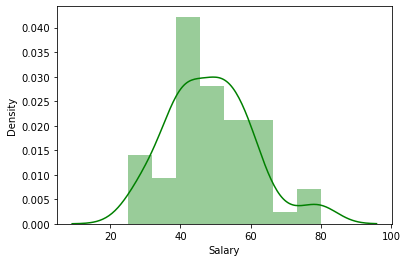

In [161]:
sns.distplot(df_survey['Salary'], kde = True, color ='green');
print('Skewness ',df_survey['Salary'].skew())
print(df_survey['Salary'].describe())

Skewness  1.5859147414045331
count      62.000000
mean      482.016129
std       221.953805
min       100.000000
25%       312.500000
50%       500.000000
75%       600.000000
max      1400.000000
Name: Spending, dtype: float64


C:\Users\ankit\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


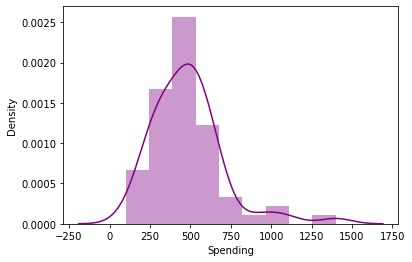

In [159]:
sns.distplot(df_survey['Spending'], kde = True, color ='purple');
print('Skewness ',df_survey['Spending'].skew())
print(df_survey['Spending'].describe())

Skewness  1.2958079731054333
count     62.000000
mean     246.209677
std      214.465950
min        0.000000
25%      100.000000
50%      200.000000
75%      300.000000
max      900.000000
Name: Text Messages, dtype: float64


C:\Users\ankit\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


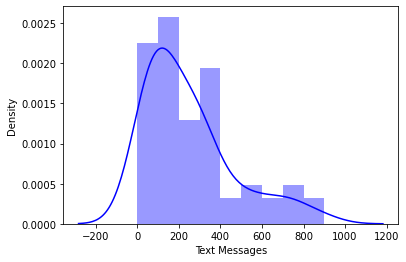

In [160]:
sns.distplot(df_survey['Text Messages'], kde = True, color ='blue');
print('Skewness ',df_survey['Text Messages'].skew())
print(df_survey['Text Messages'].describe())

Ans: From the above plot we can conclude and skew value, if the value is between -0.5 and 0.5, we consider the distribution to be approximately symmetric i.e. it follows normal distribution.
<b>Hence, GPA and Salary follow a normal distribution while Spending and Text Messages does not follow a normal distribution</b>.

2.8.2 Write a note summarizing your conclusions

Ans: <b>Hence, GPA and Salary follow a normal distribution while Spending and Text Messages does not follow a normal distribution</b>.

3.1 Do you think there is evidence that mean moisture contents in both types of shingles are within the permissible limits? State your conclusions clearly showing all steps.

In [1]:
df_shingles = pd.read_csv('A+&+B+shingles.csv')
df_shingles.head()

NameError: name 'pd' is not defined

In [141]:
alpha= 0.05
t_statistic, p_value = ttest_1samp(df_shingles['A'], 0.35)
print('One sample t test \nt statistic: {0} p value: {1} '.format(t_statistic, p_value/2))

One sample t test 
t statistic: -1.4735046253382782 p value: 0.07477633144907513 


Ans: Do not reject H0, since the p-value is greater than 0.05. The average moisture content of Sample A shingles is less than 0.35 pounds per 100 square feet, however there is insufficient data to support this claim. 0.0748 is the p-value. The probability of detecting a sample of 36 shingles with a sample mean moisture content of 0.3167 pounds per 100 square feet or less is.0748 if the population mean moisture content is infact no less than 0.35 pounds per 100 square feet.

In [145]:
t_statistic, p_value = ttest_1samp(df_shingles.B, 0.35,nan_policy='omit' )
print('One sample t test \nt statistic: {0} p value: {1} '.format(t_statistic, p_value/2))

One sample t test 
t statistic: -3.1003313069986995 p value: 0.0020904774003191826 


Ans: Reject H0 because pvalue is less than 0.05. There is sufficient data to draw the conclusion that Sample B shingles have a mean moisture content of 0.35 pounds per 100 square feet or above. 0.0021 is the p-value. The likelihood of detecting a sample of 31 shingles with a sample mean moisture content of 0.2735 pounds per 100 square feet or less is.0021 if the population mean moisture content is actually no less than 0.35 pounds per 100 square feet.

3.2 Do you think that the population means for shingles A and B are equal? Form the hypothesis and conduct the test of the hypothesis. What assumption do you need to check before the test for equality of means is performed?

In [143]:
t_statistic,p_value=ttest_ind(df_shingles['A'],df_shingles['B'],equal_var=True ,nan_policy='omit')
print("t_statistic={} and pvalue={}".format(round(t_statistic,3),round(p_value,3))) 

t_statistic=1.29 and pvalue=0.202


Ans: We can conclude that the population means for shingles A and B are equivalent Test Assumptions since the p-value > does not require us to reject H0. The two populations' distributions must be normal and their variances must be equal for a two-sample t-test to be valid. These are the fundamental presumptions. Another testing method could be used if the presumptions are unlikely to be true.